In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from google.colab import files
files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


{'Social_Network_Ads.csv': b'User ID,Gender,Age,EstimatedSalary,Purchased\r\n15624510,Male,19,19000,0\r\n15810944,Male,35,20000,0\r\n15668575,Female,26,43000,0\r\n15603246,Female,27,57000,0\r\n15804002,Male,19,76000,0\r\n15728773,Male,27,58000,0\r\n15598044,Female,27,84000,0\r\n15694829,Female,32,150000,1\r\n15600575,Male,25,33000,0\r\n15727311,Female,35,65000,0\r\n15570769,Female,26,80000,0\r\n15606274,Female,26,52000,0\r\n15746139,Male,20,86000,0\r\n15704987,Male,32,18000,0\r\n15628972,Male,18,82000,0\r\n15697686,Male,29,80000,0\r\n15733883,Male,47,25000,1\r\n15617482,Male,45,26000,1\r\n15704583,Male,46,28000,1\r\n15621083,Female,48,29000,1\r\n15649487,Male,45,22000,1\r\n15736760,Female,47,49000,1\r\n15714658,Male,48,41000,1\r\n15599081,Female,45,22000,1\r\n15705113,Male,46,23000,1\r\n15631159,Male,47,20000,1\r\n15792818,Male,49,28000,1\r\n15633531,Female,47,30000,1\r\n15744529,Male,29,43000,0\r\n15669656,Male,31,18000,0\r\n15581198,Male,31,74000,0\r\n15729054,Female,27,137000,1\r\n1

In [0]:
dataset=pd.read_csv('Social_Network_Ads (1).csv')

In [0]:
X=dataset.iloc[:,[2,3]].values

In [0]:
y=dataset.iloc[:,4].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc=StandardScaler()

In [20]:
X_train=sc.fit_transform(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
X_test=sc.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
classifier=RandomForestClassifier(n_estimators=10,random_state=0,criterion='entropy')

In [23]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred=classifier.predict(X_test)

In [25]:
classifier.score(X_test,y_test)

0.9

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm=confusion_matrix(y_test,y_pred)

In [28]:
cm

array([[63,  5],
       [ 5, 27]])

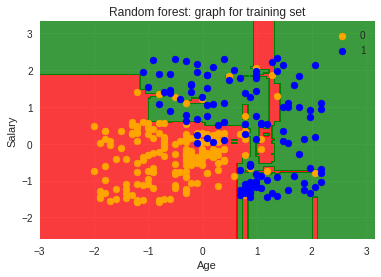

In [29]:
#visualization:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('Random forest: graph for training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

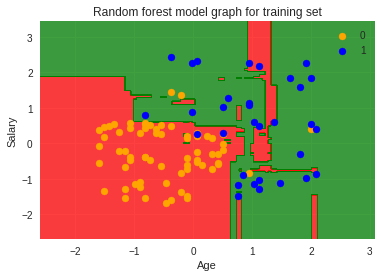

In [30]:
#for testing set
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('Random forest model graph for training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
